<a href="https://colab.research.google.com/github/dianagonzalo/Assignment-One/blob/main/Assignment_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm

url = "https://raw.githubusercontent.com/dianagonzalo/Assignment-One/refs/heads/main/ObesityDataSet_raw_and_data_sinthetic.csv"
df = pd.read_csv(url)

print(df.shape)
print(df.info())
display(df.head())
print("Missing values:\n", df.isnull().sum())

cat_cols = df.select_dtypes(include="object").columns.tolist()
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

display(df.describe(include="all"))

(2111, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                    

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Missing values:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
Numeric columns: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical columns: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


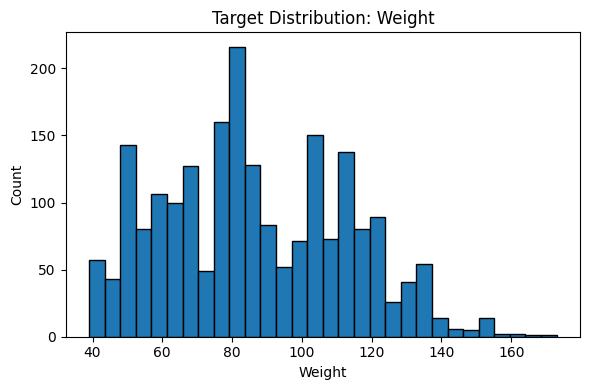

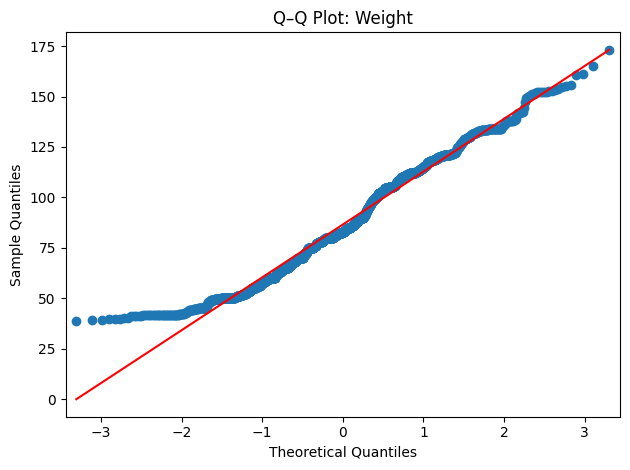

In [35]:
# Target distribution (Weight)
plt.figure(figsize=(6,4))
plt.hist(df["Weight"], bins=30, edgecolor="black")
plt.title("Target Distribution: Weight")
plt.xlabel("Weight"); plt.ylabel("Count")
plt.tight_layout(); plt.show()

# Q–Q plot for Weight (normality check)
sm.qqplot(df["Weight"], line="s")
plt.title("Q–Q Plot: Weight")
plt.tight_layout(); plt.show()

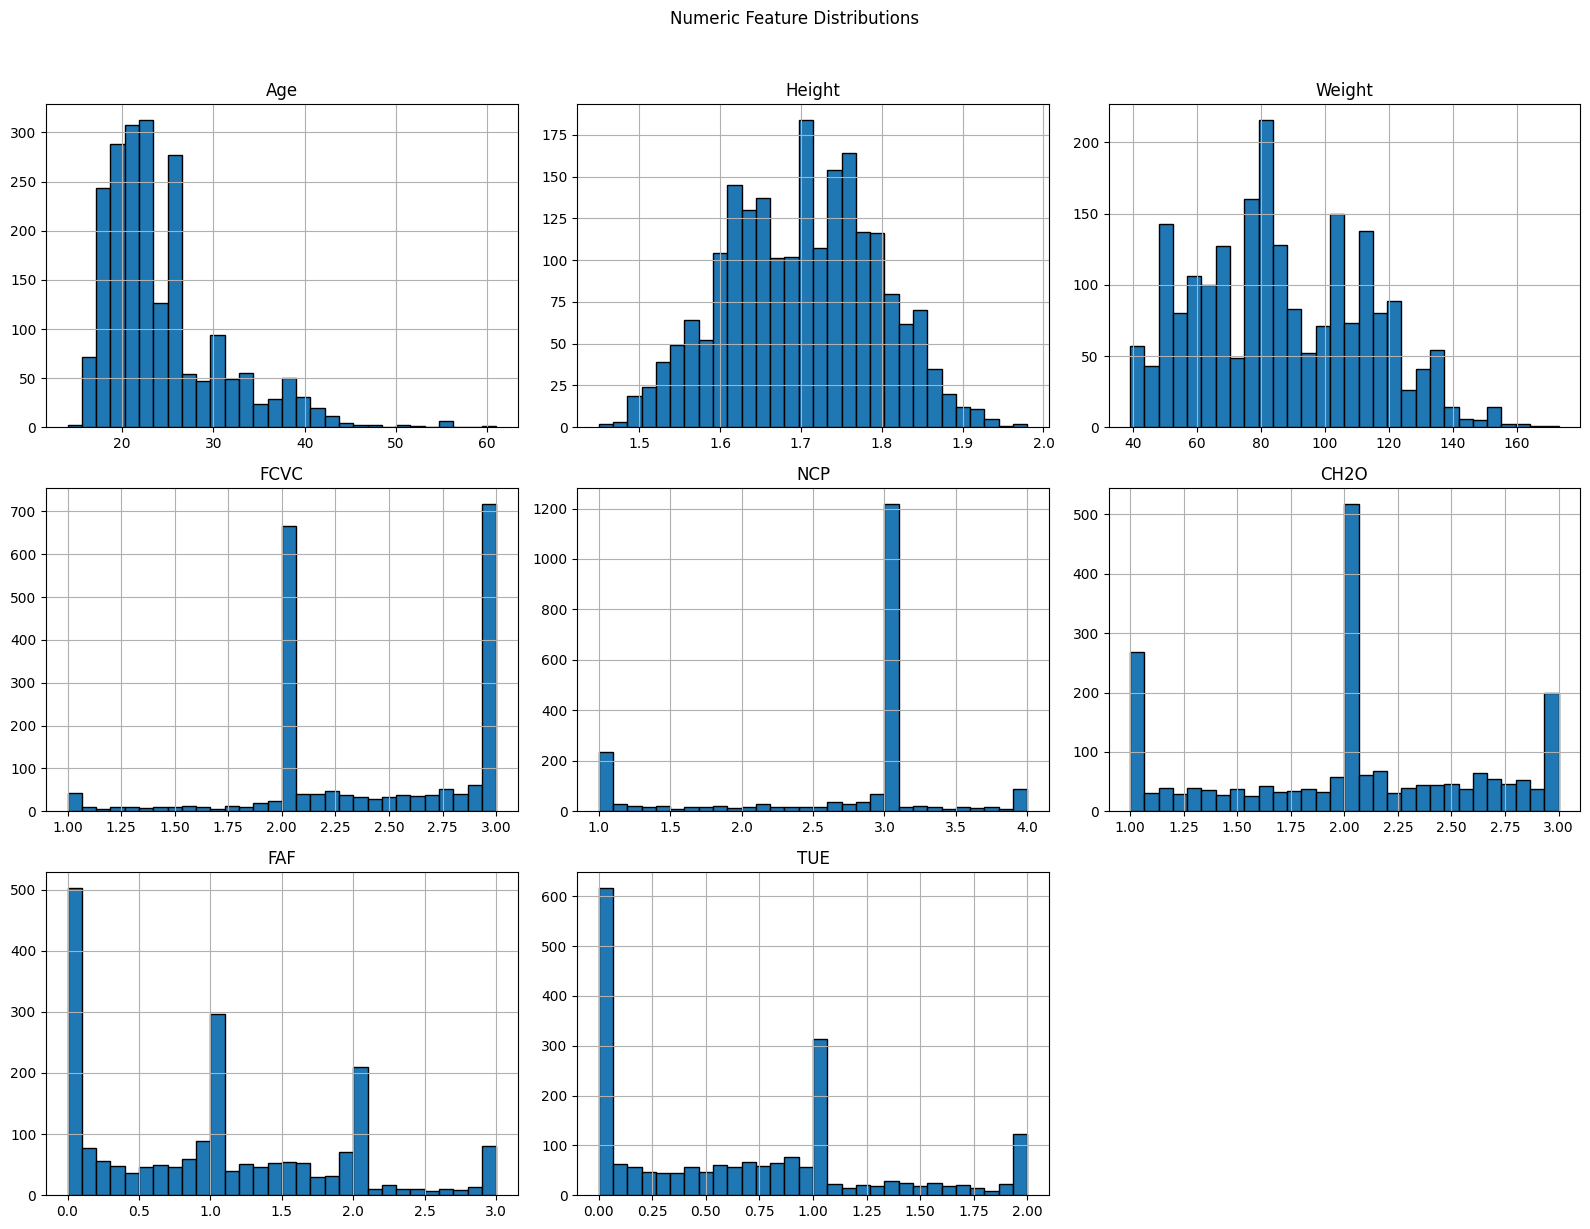

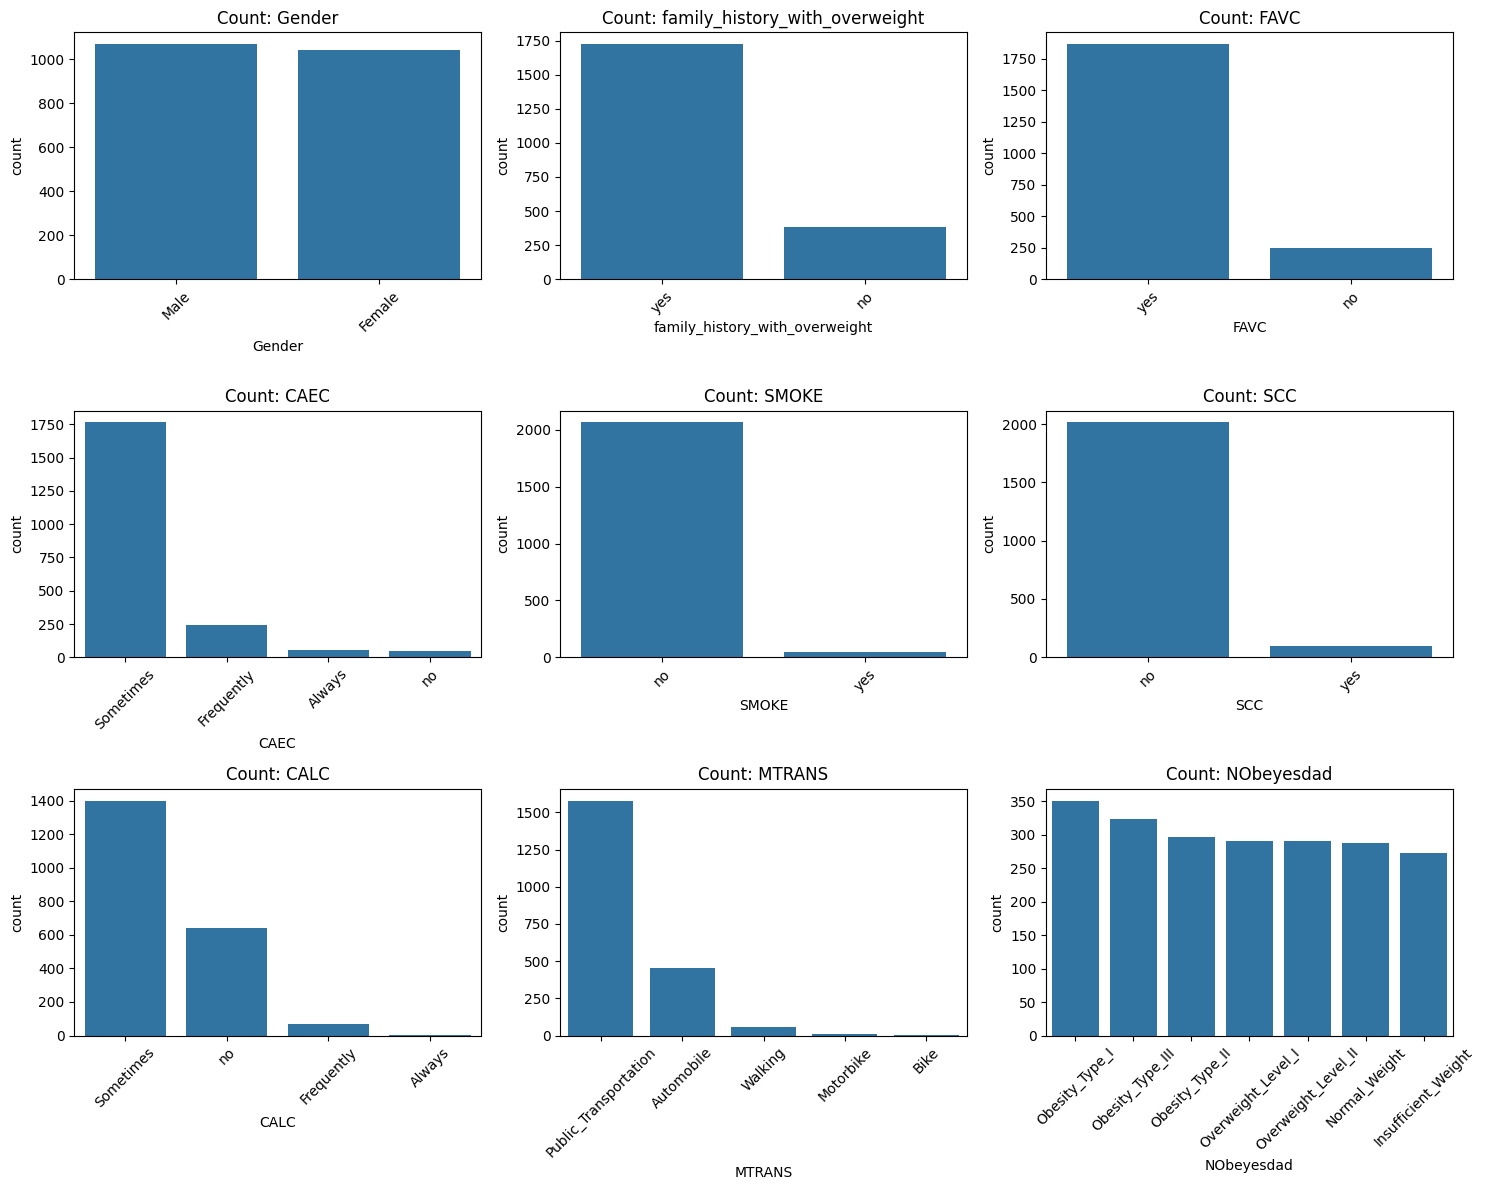

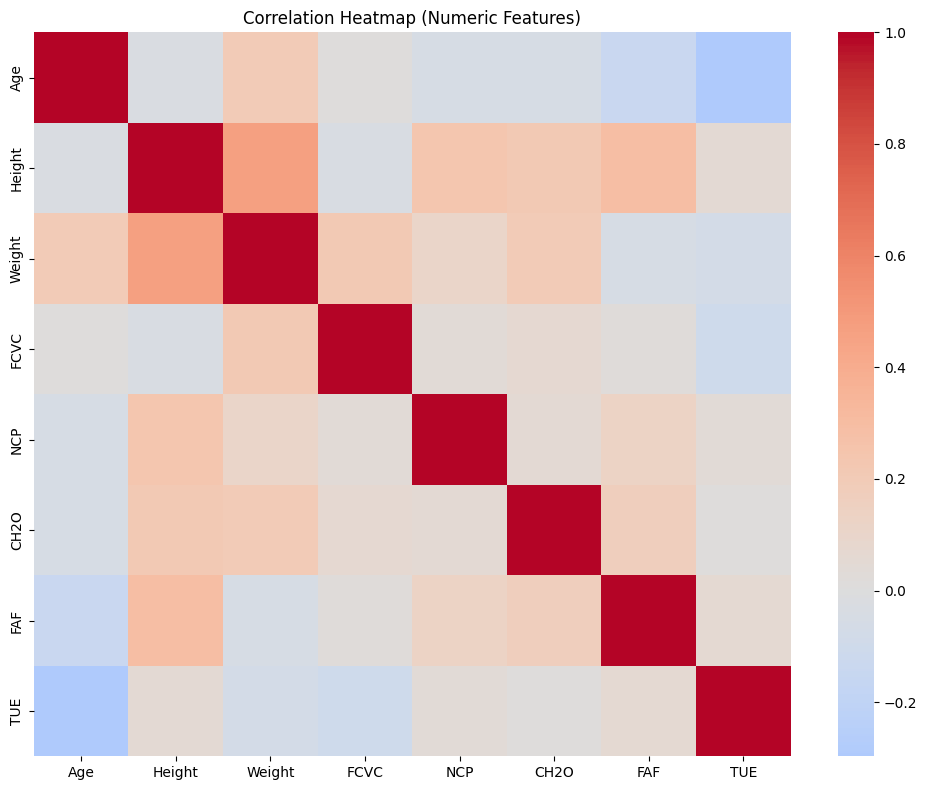

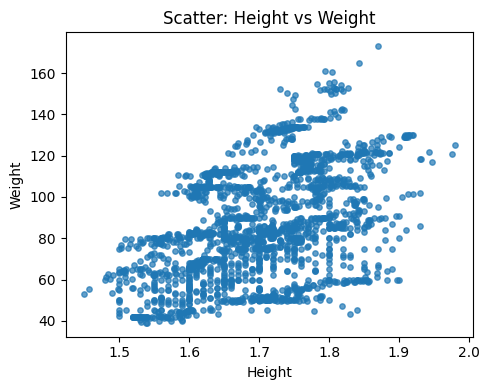

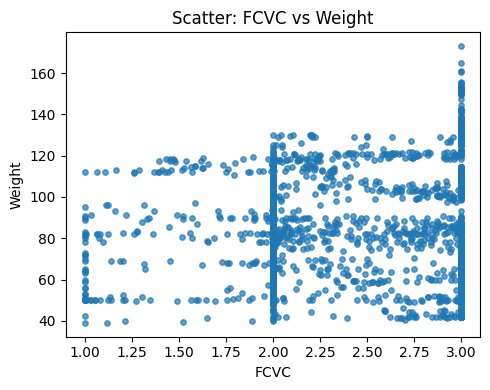

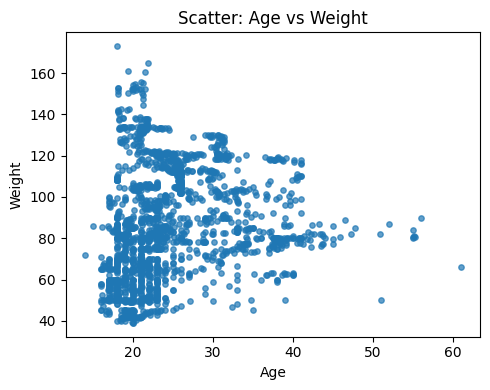

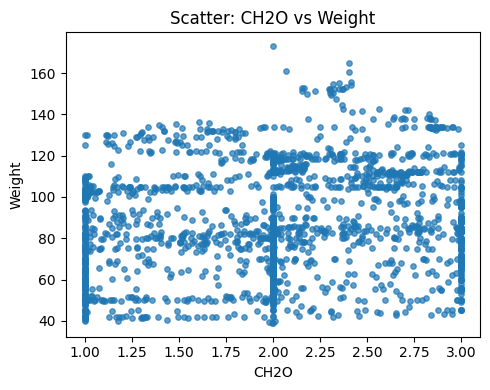

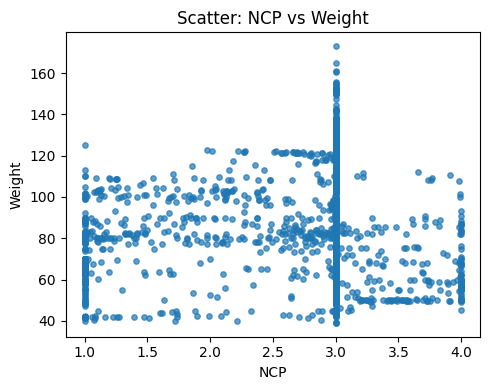

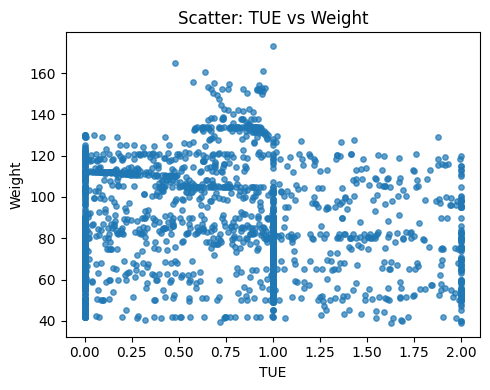

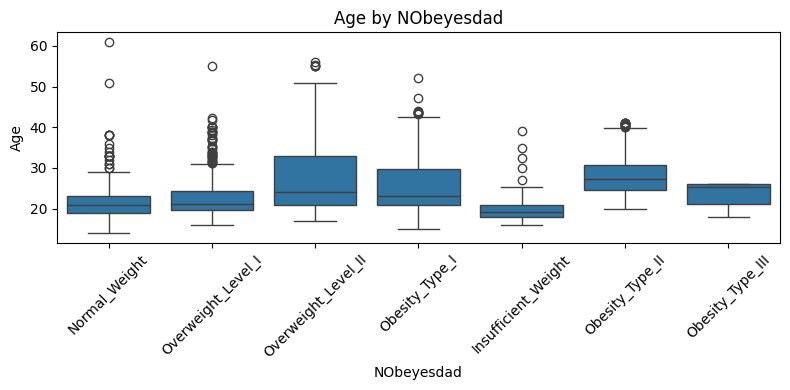

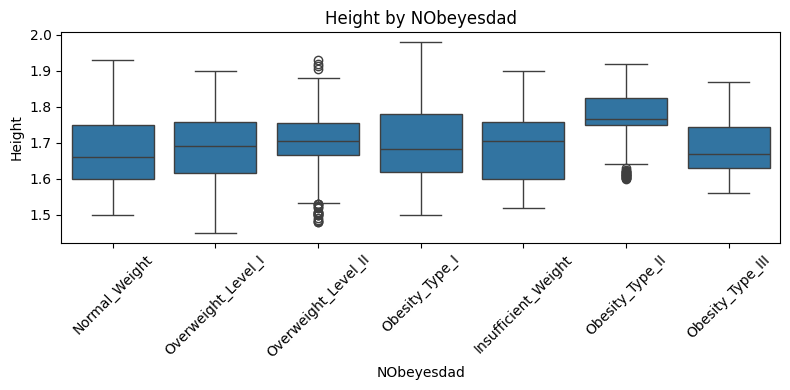

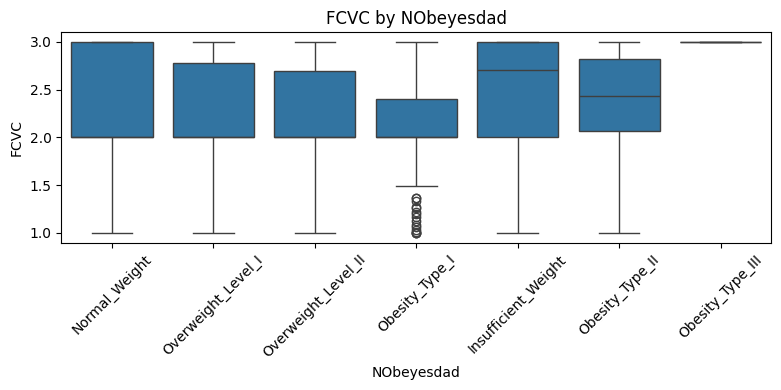

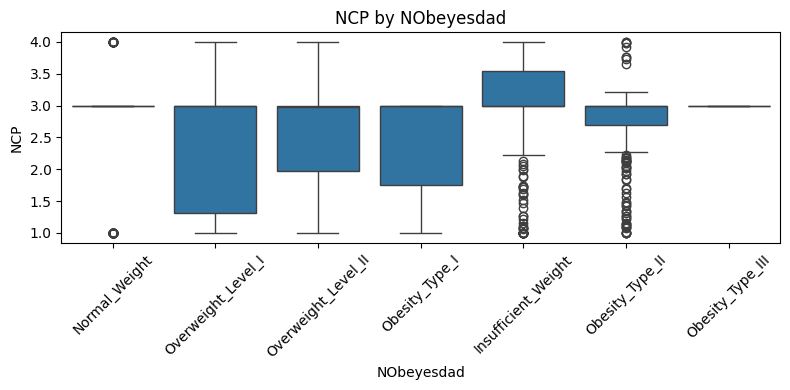

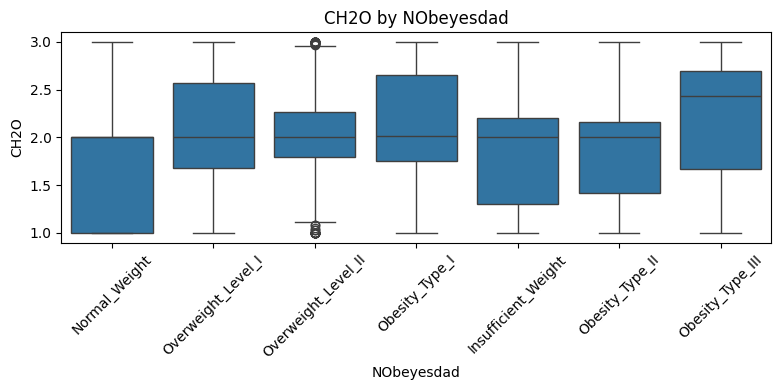

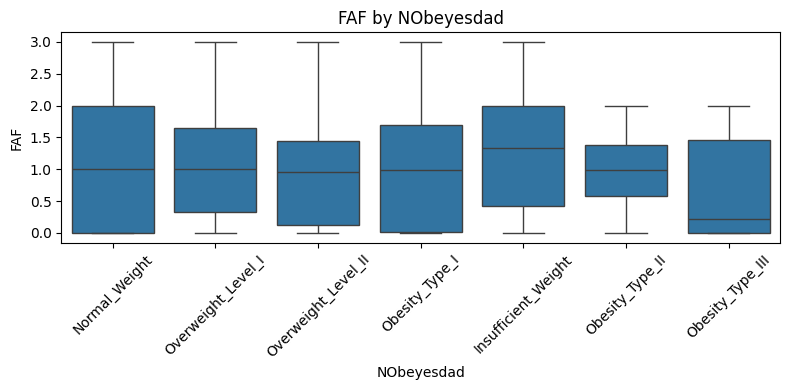

In [43]:
# Histograms of all numeric features
if len(num_cols) > 0:
    df[num_cols].hist(figsize=(16,12), bins=30, edgecolor="black")
    plt.suptitle("Numeric Feature Distributions", y=1.02)
    plt.tight_layout(); plt.show()

# Count plots for all categorical features
if len(cat_cols) > 0:
    n = len(cat_cols)
    ncols = 3
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*4))
    axes = axes.flatten() if n > 1 else [axes]

    for i, c in enumerate(cat_cols):
        order = df[c].value_counts().index
        sns.countplot(x=c, data=df, order=order, ax=axes[i])
        axes[i].set_title(f"Count: {c}")
        axes[i].tick_params(axis="x", rotation=45)
    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].axis("off")
    plt.tight_layout(); plt.show()

# Correlation heatmap (numeric-only, including Weight)
if len(num_cols) > 1:
    plt.figure(figsize=(10,8))
    corr_num = df[num_cols].corr()
    sns.heatmap(corr_num, cmap="coolwarm", center=0)
    plt.title("Correlation Heatmap (Numeric Features)")
    plt.tight_layout(); plt.show()

# boxplots of numeric features by obesity class
if "NObeyesdad" in df.columns:
    for c in num_wo_target[:6]:
        plt.figure(figsize=(8,4))
        sns.boxplot(x="NObeyesdad", y=c, data=df)
        plt.xticks(rotation=45)
        plt.title(f"{c} by NObeyesdad")
        plt.tight_layout(); plt.show()

In [37]:
TARGET = "Weight"
y = df[TARGET]
X = df.drop(columns=[TARGET])

# One-hot encode categoricals
X = pd.get_dummies(X, drop_first=True)

# Standardize Features ----
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Feature Selection (don’t use everything blindly): top 15 by |corr with Weight| ----
corr_full = X.join(y).corr()["Weight"].drop("Weight").abs().sort_values(ascending=False)
selected = corr_full.head(15).index.to_list()
print("Selected features:", selected)

# Train/Test Split ----
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled[selected], y, test_size=0.2, random_state=42
)

Selected features: ['NObeyesdad_Obesity_Type_III', 'family_history_with_overweight_yes', 'Height', 'NObeyesdad_Obesity_Type_II', 'CAEC_Sometimes', 'CAEC_Frequently', 'NObeyesdad_Normal_Weight', 'FAVC_yes', 'CALC_Sometimes', 'CALC_no', 'FCVC', 'Age', 'SCC_yes', 'CH2O', 'NObeyesdad_Overweight_Level_I']


In [39]:
param_grid = {
    "loss": ["squared_error", "huber"],
    "penalty": ["l2", "l1", "elasticnet"],
    "alpha": [1e-4, 1e-3, 1e-2],
    "learning_rate": ["optimal", "invscaling", "constant"],
    "eta0": [0.001, 0.01, 0.1],
    "max_iter": [2000],
    "tol": [1e-3],
    "random_state": [42]
}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(
    SGDRegressor(),
    param_grid,
    scoring="r2",
    cv=cv,
    n_jobs=-1
)
print("Running SGDRegressor grid search...")
grid.fit(X_train, y_train)
print("Best SGD params:", grid.best_params_)
print("Best CV R²:", grid.best_score_)

best_sgd = grid.best_estimator_
y_pred_sgd = best_sgd.predict(X_test)

mse = mean_squared_error(y_test, y_pred_sgd)
rmse = np.sqrt(mse)
print("SGD Test R²:", r2_score(y_test, y_pred_sgd))
print("SGD Test RMSE:", rmse)

Running SGDRegressor grid search...
Best SGD params: {'alpha': 0.01, 'eta0': 0.01, 'learning_rate': 'invscaling', 'loss': 'squared_error', 'max_iter': 2000, 'penalty': 'l2', 'random_state': 42, 'tol': 0.001}
Best CV R²: 0.8176768623703236
SGD Test R²: 0.8102494166872125
SGD Test RMSE: 11.566987974433196


In [44]:
X_train_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

X_test_sm = sm.add_constant(X_test)
y_pred_ols = ols_model.predict(X_test_sm)

rmse_ols = np.sqrt(mean_squared_error(y_test, y_pred_ols))
print("OLS Test R²:", r2_score(y_test, y_pred_ols))
print("OLS Test RMSE:", rmse_ols)

def backward_elimination_by_p(X, y, sl=0.05, verbose=True):
    cols = list(X.columns)
    while True:
        Xc = sm.add_constant(X[cols])
        model = sm.OLS(y, Xc).fit()
        # drop intercept from consideration
        pvals = model.pvalues.drop(labels=["const"], errors="ignore")
        max_p = pvals.max()
        if max_p > sl:
            drop_col = pvals.idxmax()
            if verbose:
                print(f"Dropping {drop_col} (p={max_p:.4f})")
            cols.remove(drop_col)
        else:
            break
    final_model = sm.OLS(y, sm.add_constant(X[cols])).fit()
    return final_model, cols

print("\n--- OLS with backward elimination (p-value pruning) ---")
be_model, kept_features = backward_elimination_by_p(X_train, y_train, sl=0.05, verbose=True)
print("Kept features:", kept_features)
print(be_model.summary())

# Evaluate pruned model on the test set (same kept features)
X_test_be = sm.add_constant(X_test[kept_features], has_constant="add")
y_pred_be = be_model.predict(X_test_be)
rmse_be = np.sqrt(mean_squared_error(y_test, y_pred_be))
print("BE OLS Test R²:", r2_score(y_test, y_pred_be))
print("BE OLS Test RMSE:", rmse_be)

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     511.9
Date:                Sat, 20 Sep 2025   Prob (F-statistic):               0.00
Time:                        20:48:54   Log-Likelihood:                -6447.9
No. Observations:                1688   AIC:                         1.293e+04
Df Residuals:                    1672   BIC:                         1.301e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

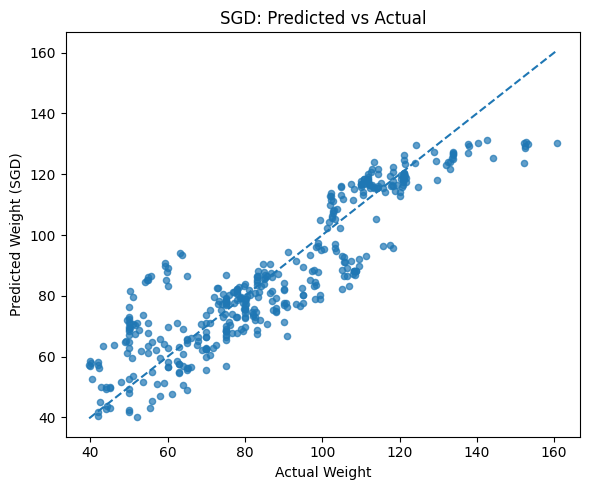

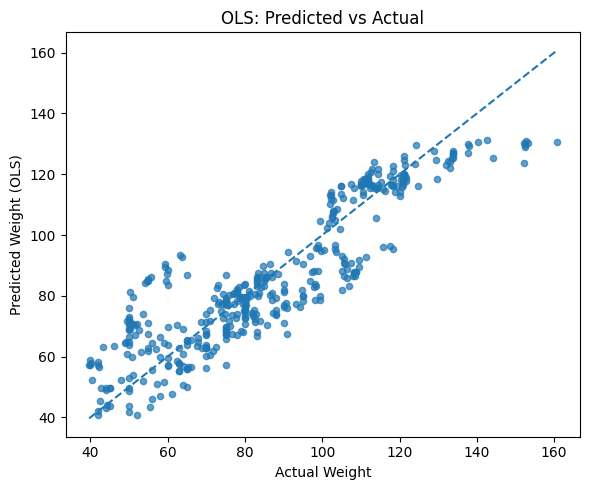

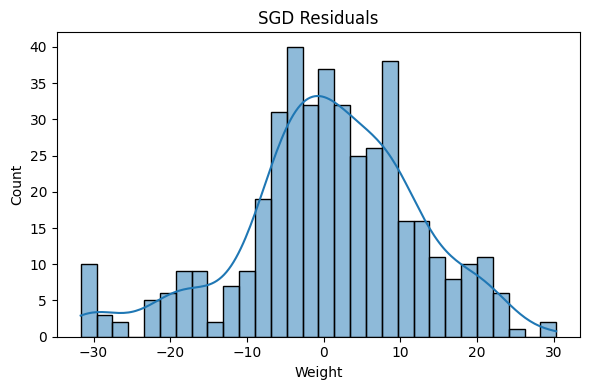

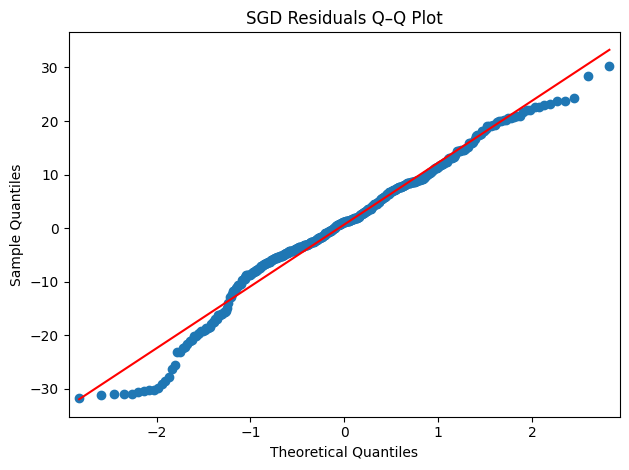

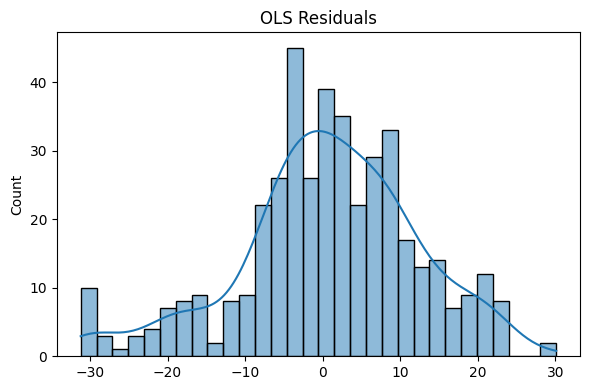

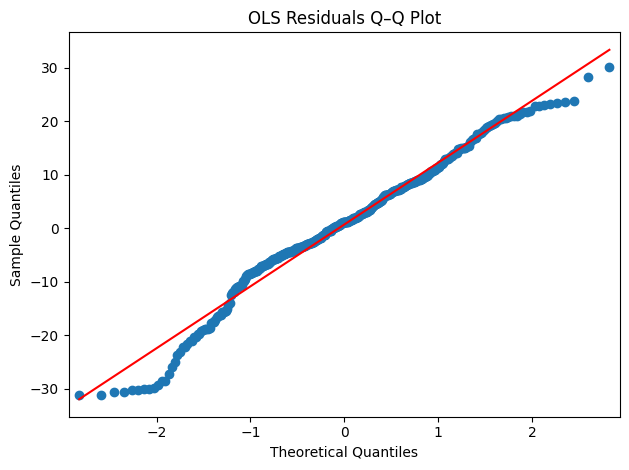

In [42]:
# Predicted vs Actual
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_sgd, s=20, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--')
plt.xlabel("Actual Weight"); plt.ylabel("Predicted Weight (SGD)")
plt.title("SGD: Predicted vs Actual")
plt.tight_layout(); plt.show()

plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred_ols, s=20, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--')
plt.xlabel("Actual Weight"); plt.ylabel("Predicted Weight (OLS)")
plt.title("OLS: Predicted vs Actual")
plt.tight_layout(); plt.show()

# Residuals
resid_sgd = y_test - y_pred_sgd
plt.figure(figsize=(6,4))
sns.histplot(resid_sgd, bins=30, kde=True)
plt.title("SGD Residuals")
plt.tight_layout(); plt.show()

sm.qqplot(resid_sgd, line='s')
plt.title("SGD Residuals Q–Q Plot")
plt.tight_layout(); plt.show()

resid_ols = y_test - y_pred_ols
plt.figure(figsize=(6,4))
sns.histplot(resid_ols, bins=30, kde=True)
plt.title("OLS Residuals")
plt.tight_layout(); plt.show()

sm.qqplot(resid_ols, line='s')
plt.title("OLS Residuals Q–Q Plot")
plt.tight_layout(); plt.show()